In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import matplotlib
import itertools

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier

matplotlib.use('Agg')

%matplotlib inline

Using TensorFlow backend.
Using TensorFlow backend.


In [2]:
iteracje = 40 # Liczba iteracji uczenia sieci

In [3]:
heart = pd.read_csv("heart.csv")



#dane = dane.drop(['filename'], axis=1) # Usunięcie metadanych

In [4]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
# Transformacja atrybutu decyzyjnego na tzw. kodowanie gorącojedynkowe

lb = LabelBinarizer()
labels_categorical = lb.fit_transform(heart['target'])
# labels_categorical = to_categorical(labels_categorical)

In [6]:
labels_categorical

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [7]:
lb.classes_ # Oryginalne klasy występujące w zbiorze danych

array([0, 1])

array([0, 1])

In [8]:
# Usunięcie klasy decyzyjnej z danych (ta informacja została zapisana w innej zmiennej)
dane_tr = heart.drop(['target'], axis=1)

In [9]:
# Normalizacja wartości
x = dane_tr.values

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dane_tr = pd.DataFrame(x_scaled)

In [10]:
# Dzielenie zbioru na dane treningowe i testowe
(x_train, x_test, y_train, y_test) = train_test_split(dane_tr, labels_categorical, test_size=0.33, random_state=32)

In [12]:
x_train.shape

(203, 13)

(203, 13)

In [13]:
y_train.shape

(203, 1)

(203, 1)

In [14]:
# Ustalenie struktury sieci
model = Sequential()

model.add(Dense(100, activation='relu', input_shape=(13,)))
model.add(Dropout(0.3))

model.add(Dense(100, activation='softsign'))
model.add(Dropout(0.3))

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(len(y_train[0]), activation='softmax'))

model.summary() # Wyświetlenie podsumowania skonstruowanego modelu

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1400      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
________________________________

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# Trenowanie sieci
history = model.fit(x_train, y_train, batch_size=16, validation_data=(x_test, y_test), epochs=iteracje)

ValueError: You are passing a target array of shape (203, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

ValueError: You are passing a target array of shape (203, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

In [1]:
# Ewaluacja
predictions = model.predict(x_test, batch_size=16)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

NameError: name 'model' is not defined

$Precision=\frac{TP}{TP+FP}$

$Recall=\frac{TP}{TP+FN}$

$F1=2\frac{Precision*Recall}{Precision+Recall}$

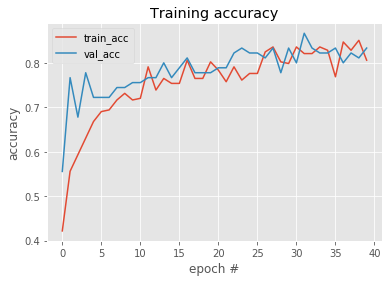

In [17]:
arr = np.arange(0, iteracje)
plt.style.use("ggplot")
plt.figure()
plt.plot(arr, history.history["acc"], label="train_acc")
plt.plot(arr, history.history["val_acc"], label="val_acc")
plt.title("Training accuracy")
plt.xlabel("epoch #")
plt.ylabel("accuracy")
plt.legend()
plt.show()

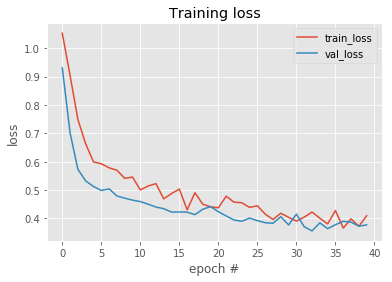

In [18]:
arr = np.arange(0, iteracje)
plt.style.use("ggplot")
plt.figure()
plt.plot(arr, history.history["loss"], label="train_loss")
plt.plot(arr, history.history["val_loss"], label="val_loss")
plt.title("Training loss")
plt.xlabel("epoch #")
plt.ylabel("loss")
plt.legend()
plt.show()

In [19]:
model.predict_classes(chopin_test.drop(['filename', 'kompozytor'], axis=1))

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
predictions = model.predict_classes(x_test)

In [21]:
# Transformacja z kodowania gorącojedynkowego na liczby całkowite
labels_ints = np.array([np.where(label==1)[0][0] for label in y_test])

In [22]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [23]:
cm = confusion_matrix(labels_ints, predictions)

[[33  4  0]
 [10 18  0]
 [ 0  1 24]]


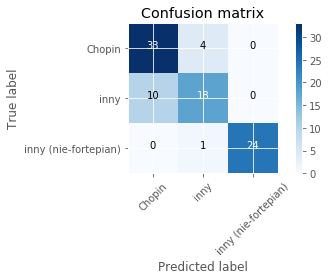

In [24]:
plot_confusion_matrix(cm, lb.classes_)

In [25]:
rfc = RandomForestClassifier(n_estimators=101, n_jobs=4, verbose=1)

rfc.fit(x_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 101 out of 101 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=101, n_jobs=4,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [26]:
predictions_rfc = rfc.predict(x_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 101 out of 101 | elapsed:    0.1s finished


In [27]:
print(classification_report(y_test, predictions_rfc, target_names=lb.classes_))

                      precision    recall  f1-score   support

              Chopin       0.78      0.84      0.81        37
                inny       0.75      0.64      0.69        28
inny (nie-fortepian)       1.00      0.96      0.98        25

           micro avg       0.83      0.81      0.82        90
           macro avg       0.84      0.81      0.83        90
        weighted avg       0.83      0.81      0.82        90
         samples avg       0.81      0.81      0.81        90



/home/jg/Programy/anaconda3/envs/ml-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
